In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [109]:
filepath = "data/full_yearly.csv"

acreage_df = pd.read_csv(filepath)
acreage_df

,Year,Number of Fires,Avg. Acres Burned,Median Acres Burned,Avg. Fire Duration (Days),Median Fire Duration (Days),Mean Snow Depth (in),Max Snow Depth (in)
0,2013,14,2264.43,106.0,2.78,1.07,44.16,295
1,2014,9,10943.00,85.0,4.62,1.58,38.54,295
2,2015,13,5788.54,104.0,6.67,3.94,23.51,313
3,2016,30,161.07,87.5,2.26,1.18,54.93,311
4,2017,51,819.82,76.0,166.19,171.80,94.22,312
5,2018,27,5906.89,67.0,148.46,155.84,29.63,202
6,2019,21,82.05,50.0,3.31,0.70,84.85,330
7,2020,30,1967.23,77.0,2.08,0.73,40.44,332
8,2021,17,4254.88,118.0,11.89,1.92,43.72,322
9,2022,12,113.17,41.5,5.88,4.02,43.06,329


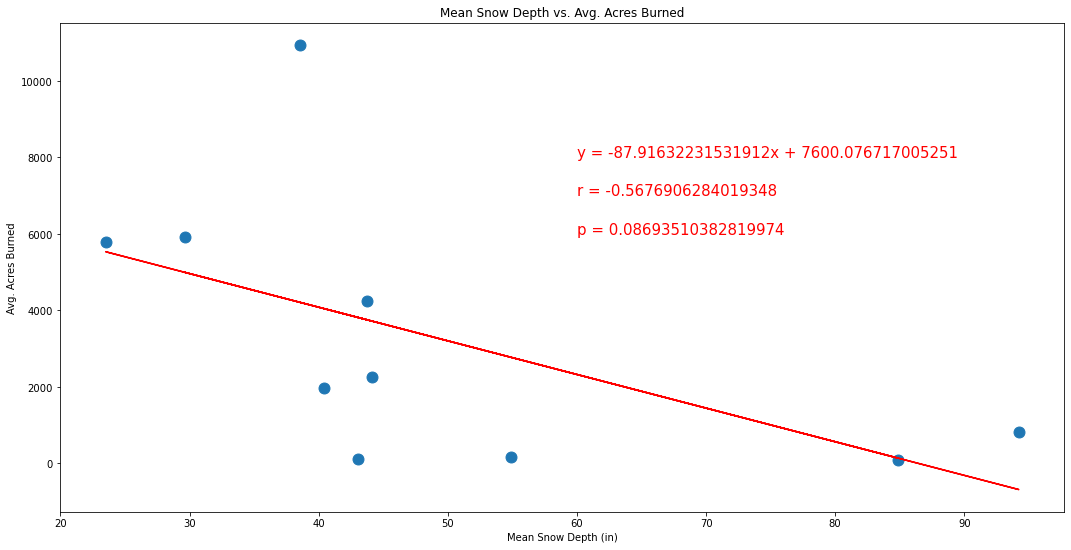

In [110]:
outputpath = "figures/scatter_mean_depth_mean_acres"
x_data = acreage_df["Mean Snow Depth (in)"]
y_data = acreage_df["Avg. Acres Burned"]

plt.figure(figsize=(18,9))

acres = plt.scatter(x_data,y_data, s=120)
plt.xlabel("Mean Snow Depth (in)")
plt.ylabel("Avg. Acres Burned")
plt.title("Mean Snow Depth vs. Avg. Acres Burned")


(slope, intercept, r_value, p_value, stderr) = st.linregress(x_data,y_data)
fit = slope * x_data + intercept
plt.plot(x_data, fit, "-r")
plt.annotate(f"y = {slope}x + {intercept}", xy= [60,8000], fontsize = 15, color="red")
plt.annotate(f"r = {r_value}", xy = [60, 7000], fontsize = 15, color="red")
plt.annotate(f"p = {p_value}", xy = [60, 6000], fontsize = 15, color="red")
plt.savefig(outputpath)
plt.show()


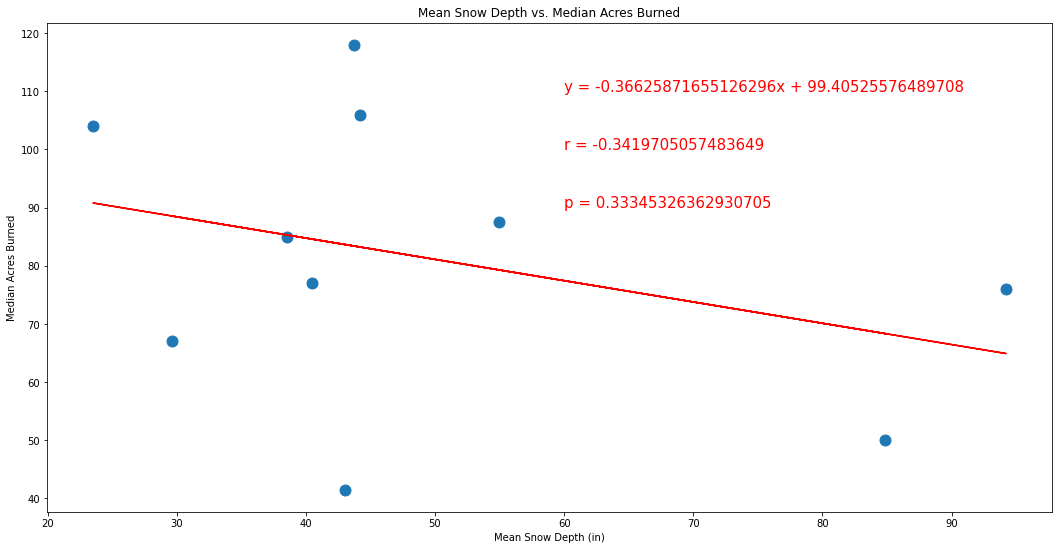

In [111]:
y_data1 = acreage_df["Median Acres Burned"]

plt.figure(figsize=(18,9))

acres = plt.scatter(x_data,y_data1, s=120)
plt.xlabel("Mean Snow Depth (in)")
plt.ylabel("Median Acres Burned")
plt.title("Mean Snow Depth vs. Median Acres Burned")


(slope, intercept, r_value, p_value, stderr) = st.linregress(x_data,y_data1)
fit = slope * x_data + intercept
plt.plot(x_data, fit, "-r")
plt.annotate(f"y = {slope}x + {intercept}", xy= [60,110], fontsize = 15, color="red")
plt.annotate(f"r = {r_value}", xy = [60, 100], fontsize = 15, color="red")
plt.annotate(f"p = {p_value}", xy = [60, 90], fontsize = 15, color="red")
plt.show()

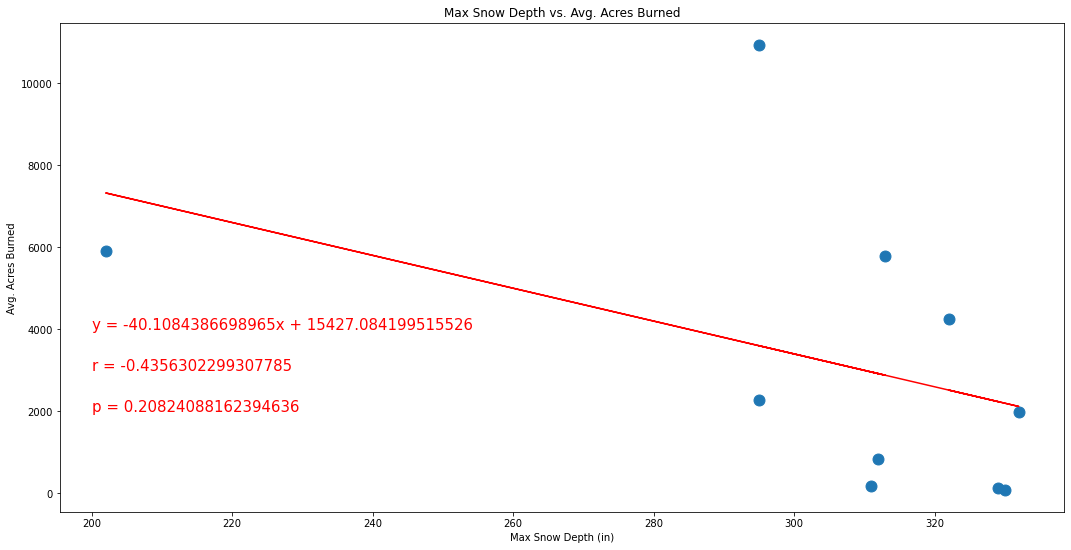

In [112]:
x_data1 = acreage_df["Max Snow Depth (in)"]
y_data = acreage_df["Avg. Acres Burned"]

plt.figure(figsize=(18,9))

acres = plt.scatter(x_data1,y_data, s=120)
plt.xlabel("Max Snow Depth (in)")
plt.ylabel("Avg. Acres Burned")
plt.title("Max Snow Depth vs. Avg. Acres Burned")


(slope, intercept, r_value, p_value, stderr) = st.linregress(x_data1,y_data)
fit = slope * x_data1 + intercept
plt.plot(x_data1, fit, "-r")
plt.annotate(f"y = {slope}x + {intercept}", xy= [200,4000], fontsize = 15, color="red")
plt.annotate(f"r = {r_value}", xy = [200, 3000], fontsize = 15, color="red")
plt.annotate(f"p = {p_value}", xy = [200, 2000], fontsize = 15, color="red")
plt.show()


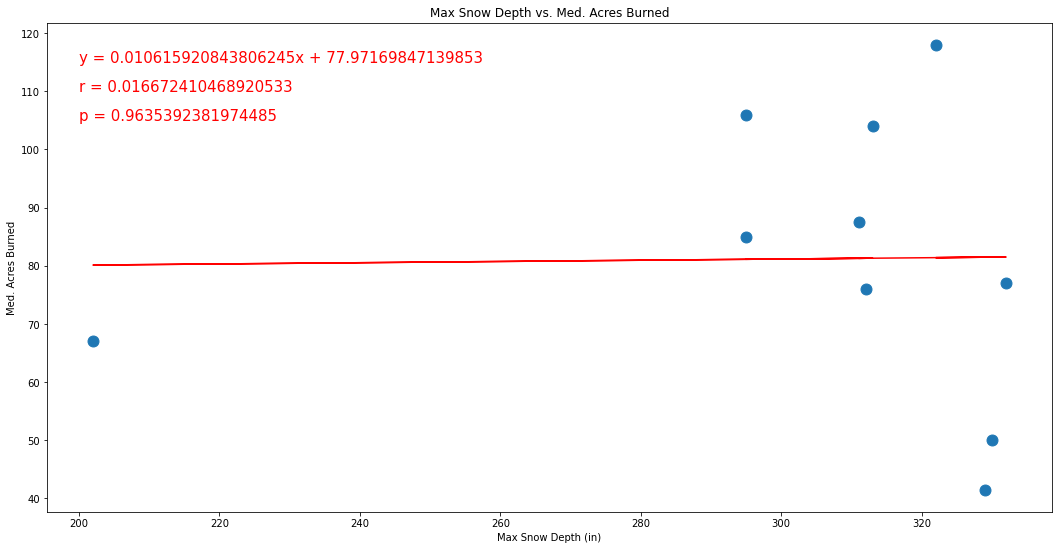

In [113]:
plt.figure(figsize=(18,9))

acres = plt.scatter(x_data1,y_data1, s=120)
plt.xlabel("Max Snow Depth (in)")
plt.ylabel("Med. Acres Burned")
plt.title("Max Snow Depth vs. Med. Acres Burned")


(slope, intercept, r_value, p_value, stderr) = st.linregress(x_data1,y_data1)
fit = slope * x_data1 + intercept
plt.plot(x_data1, fit, "-r")
plt.annotate(f"y = {slope}x + {intercept}", xy= [200,115], fontsize = 15, color="red")
plt.annotate(f"r = {r_value}", xy = [200, 110], fontsize = 15, color="red")
plt.annotate(f"p = {p_value}", xy = [200, 105], fontsize = 15, color="red")
plt.show()

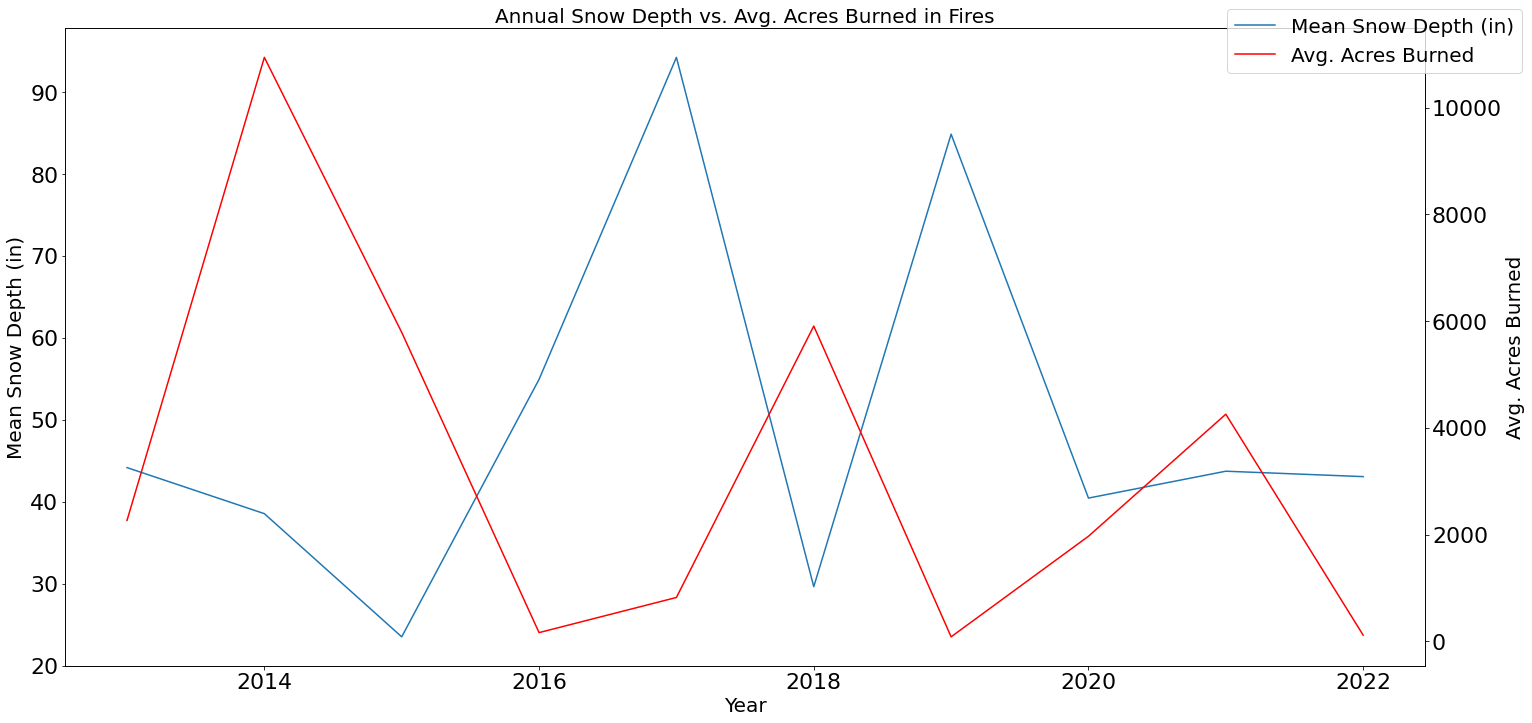

In [114]:
outputpath = "figures/current_year_acres_burned"
x_data2 = acreage_df["Year"]

fig,ax = plt.subplots(figsize = (20,10))
snow_depth = ax.plot(x_data2, x_data, label = "Mean Snow Depth (in)")
ax1 = ax.twinx()
fire_numbers = ax1.plot(x_data2, y_data, label = "Avg. Acres Burned",c="r")
ax.set_xlabel("Year",fontsize = "20")
ax.set_title("Annual Snow Depth vs. Avg. Acres Burned in Fires", fontsize = "20")
fig.tight_layout()
ax.set_ylabel("Mean Snow Depth (in)", fontsize = "20")
ax1.set_ylabel("Avg. Acres Burned", fontsize = "20")
ax.tick_params(axis='both', which='major', labelsize=22)
ax1.tick_params(axis='both', which='major', labelsize=22)
fig.legend(loc="upper right", fontsize = "20")
plt.savefig(outputpath)
plt.show()

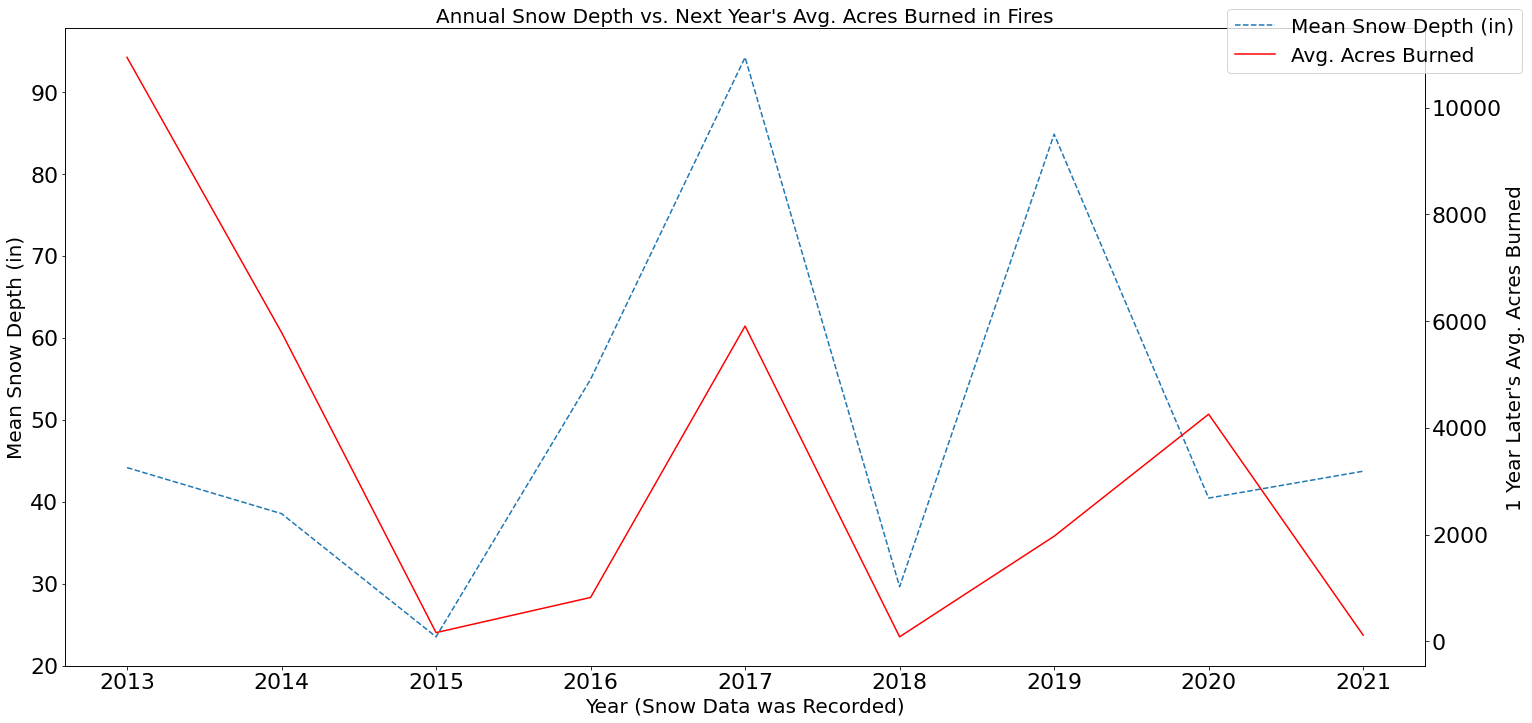

In [115]:
outputpath = "figures/following_year_acres_burned"
no13 = acreage_df.loc[acreage_df["Year"] != 2013]
no22 = acreage_df.loc[acreage_df["Year"] != 2022]

years = no22["Year"]
depth = no22["Mean Snow Depth (in)"]
burned = no13["Avg. Acres Burned"]

fig,ax = plt.subplots(figsize = (20,10))
snow_depth = ax.plot(years, depth, label = "Mean Snow Depth (in)", linestyle='--')
ax1 = ax.twinx()
fire_numbers = ax1.plot(years, burned, label = "Avg. Acres Burned",c="r")
ax.set_xlabel("Year (Snow Data was Recorded)",fontsize = "20")
ax.set_title("Annual Snow Depth vs. Next Year's Avg. Acres Burned in Fires", fontsize = "20")
fig.tight_layout()
ax.set_ylabel("Mean Snow Depth (in)", fontsize = "20")
ax1.set_ylabel("1 Year Later's Avg. Acres Burned", fontsize = "20")
ax.tick_params(axis='both', which='major', labelsize=22)
ax1.tick_params(axis='both', which='major', labelsize=22)
fig.legend(loc="upper right", fontsize = "20")
plt.savefig(outputpath)
plt.show()